In [8]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets
import pandas as pd
import math

import sys
from pathlib import Path

In [9]:
ad = Path('imgs-main/src')
sys.path.insert(0,str(ad))

In [10]:
import my_mod

In [11]:
im1 = np.array(Image.open('imgs-main/cameraman.tif'))
im2 = np.array(Image.open('imgs-main/sent.jpg'))
im3 = np.array(Image.open('imgs-main/pirate.tif'))
im4 = np.array(Image.open('imgs-main/lena_gray_512.tif'))
im5 = np.array(Image.open('imgs-main/woman_blonde.tif'))
im6 = np.array(Image.open('imgs-main/livingroom.tif'))

FileNotFoundError: [Errno 2] No such file or directory: 'imgs-main/cameraman.tif'

In [ ]:
np.random.seed(10)
ar = np.random.randint(50,175,(10,10))
ar

array([[ 59, 150,  65, 114, 163, 173,  78, 139, 143, 162],
       [ 79, 163, 172,  58, 123,  50, 156,  90, 168,  86],
       [165,  66, 150, 161,  61, 104, 138, 157, 172, 112],
       [ 83, 122, 150, 128,  99, 101, 104, 127, 119,  63],
       [165,  75,  63, 142, 136,  80,  80, 139,  62, 115],
       [ 81, 107,  86,  77,  68, 143, 127,  72,  73, 144],
       [170,  61,  78, 124, 138,  59,  65,  68, 130, 168],
       [121, 138,  61,  67,  96,  57, 125,  78,  83, 134],
       [172, 146, 138,  94,  55,  54, 121, 138, 138, 100],
       [158, 104,  84, 154,  65, 127, 138,  65,  56, 168]])

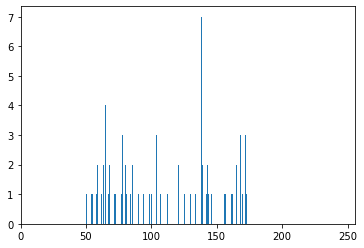

In [ ]:
plt.hist(ar.ravel(),bins=256);
plt.xlim(0,256);

In [ ]:
#contrast: diff> max - min
ct = ar.max()-ar.min()
ct

123

In [ ]:
#ar.max() >> 255, ar.min()>> 0
print(f'min: is {ar.min()} should be 0\nmax: is {ar.max()} should be 255')

min: is 50 should be 0
max: is 173 should be 255


# Eq :

$ y = a*x + b$

--> 1: 0= a *50 +b
--> 2: 255= a* 173 + b

In [ ]:
def st1(im: 'np.array'):
    x_min = im.min()
    x_max = im.max()

    y_min = 0
    y_max = 255
    # y_min = a * x_min + b
    # y_max = a * x_max + b
    # y_max - y_min = a * (x_max - x_min)
    # a = (y_max - y_min) / (x_max - x_min)
    # b = y_max - a * x_max

    a = (y_max - y_min) / (x_max - x_min)
    b = y_max - a * x_max

    out = np.round(a * im + b,0)
    return out.astype(np.uint8)

In [ ]:
ar_s=st1(ar)
ar_s

array([[ 19, 207,  31, 133, 234, 255,  58, 185, 193, 232],
       [ 60, 234, 253,  17, 151,   0, 220,  83, 245,  75],
       [238,  33, 207, 230,  23, 112, 182, 222, 253, 129],
       [ 68, 149, 207, 162, 102, 106, 112, 160, 143,  27],
       [238,  52,  27, 191, 178,  62,  62, 185,  25, 135],
       [ 64, 118,  75,  56,  37, 193, 160,  46,  48, 195],
       [249,  23,  58, 153, 182,  19,  31,  37, 166, 245],
       [147, 182,  23,  35,  95,  15, 155,  58,  68, 174],
       [253, 199, 182,  91,  10,   8, 147, 182, 182, 104],
       [224, 112,  70, 216,  31, 160, 182,  31,  12, 245]], dtype=uint8)

In [ ]:
ar_s.max(), ar_s.min()

(255, 0)

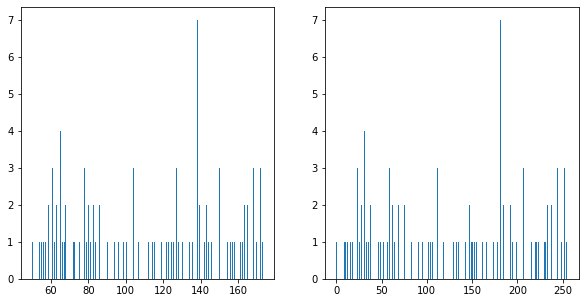

In [ ]:
my_mod.img_show(ar,ar_s,h=1)

In [ ]:
#st1 with im1

im1_s = st1(im1)
im1_s

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

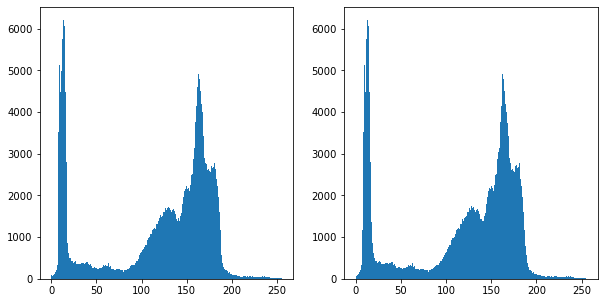

In [ ]:
my_mod.img_show(im1,im1_s,h=1)

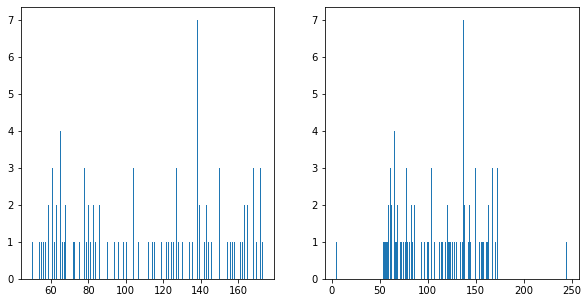

In [ ]:
ar1 = ar.copy()
idx = ar == ar.min()
ar1[idx] = 5

idx = ar == ar.max()
ar1[idx] = 245

my_mod.img_show(ar,ar1,h=1)

In [ ]:
def st2(im: 'np.array', x_min, x_max):
    y_min = 0
    y_max = 255


    a = (x_max - x_min) / (y_max - y_min)
    b = y_max - a * x_max

    out = np.round(a * im + b,0)
    return out.astype(np.uint8)

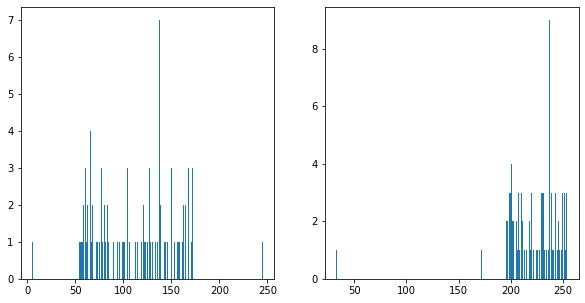

In [ ]:
ar2_s = st2(ar1,50,175)
my_mod.img_show(ar1,ar2_s,h=1)

In [ ]:
x_min, x_max = np.percentile(ar1,[10,90])
x_min, x_max

(61.0, 163.20000000000002)

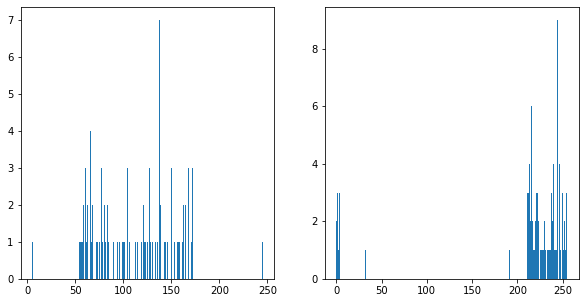

In [ ]:
ar2_s = st2(ar1,x_min, x_max)
my_mod.img_show(ar1,ar2_s,h=1)

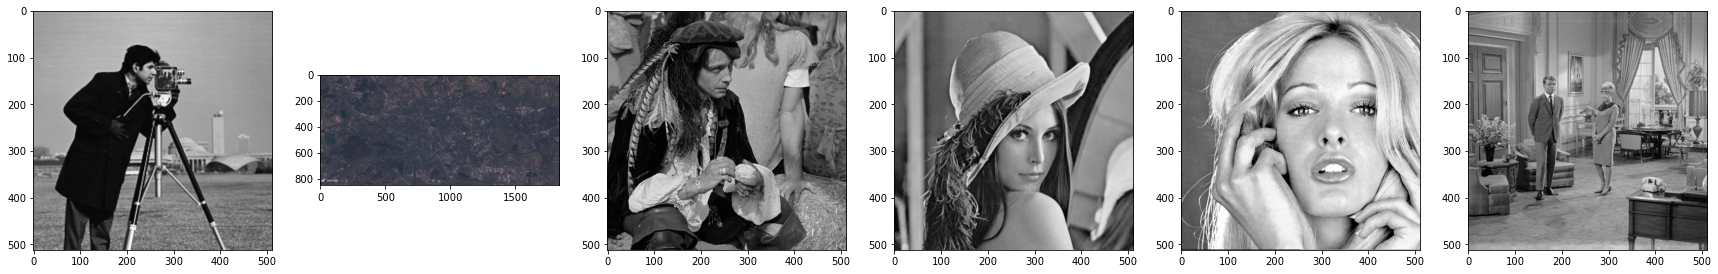

In [ ]:
my_mod.img_show(im1,im2,im3,im4,im5,im6)